Learning Pandas
===============

This is a Jupyter notebook I make for learning Pandas. Material is from [https://realpython.com/pandas-dataframe/](https://realpython.com/pandas-dataframe/).

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

Introducing `DataFrame`
-----------------------

There are a couple of ways to create Pandas `DataFrame`. Example below is creating `DataFrame` from Python's `dict`.

In [2]:
data = {
    "name":

 ["Xavier", "Ann", "Jana", "Yi", "Robin", "Amal", "Nori"],
    "city": ["Mexico City", "Toronto", "Prague", "Shanghai", "Manchester", "Cairo", "Osaka"],
    "age": [41, 28, 33, 34, 38, 31, 37],
    "py-score": [88.0, 79.0, 81.0, 80.0, 68.0, 61.0, 84.0]
}
row_labels = [101, 102, 103, 104, 105, 106, 107]

df = pd.DataFrame(data=data, index=row_labels)
df

,name,city,age,py-score
101,Xavier,Mexico City,41,88.0
102,Ann,Toronto,28,79.0
103,Jana,Prague,33,81.0
104,Yi,Shanghai,34,80.0
105,Robin,Manchester,38,68.0
106,Amal,Cairo,31,61.0
107,Nori,Osaka,37,84.0


In order to view the first `n` data, you could do the following:

In [3]:
df.head(n=2)

,name,city,age,py-score
101,Xavier,Mexico City,41,88.0
102,Ann,Toronto,28,79.0


or using Python's slicing lingo, like the following:

In [4]:
df[:2]

,name,city,age,py-score
101,Xavier,Mexico City,41,88.0
102,Ann,Toronto,28,79.0


Conversely, if you want to view the last `n` data, you could do the following:

In [5]:
df.tail(n=2)

,name,city,age,py-score
106,Amal,Cairo,31,61.0
107,Nori,Osaka,37,84.0


or simply using Python's slicing lingo:

In [6]:
df[-2:]

,name,city,age,py-score
106,Amal,Cairo,31,61.0
107,Nori,Osaka,37,84.0


You could view only a single column like so:

In [7]:
df["city"]

101    Mexico City
102        Toronto
103         Prague
104       Shanghai
105     Manchester
106          Cairo
107          Osaka
Name: city, dtype: object

If you want to view multiple columns:

In [8]:
df[["name", "city"]]

,name,city
101,Xavier,Mexico City
102,Ann,Toronto
103,Jana,Prague
104,Yi,Shanghai
105,Robin,Manchester
106,Amal,Cairo
107,Nori,Osaka


In [9]:
cities = df["city"] # or using dot notation like df.city if name of identifier is valid Python identifier
cities

101    Mexico City
102        Toronto
103         Prague
104       Shanghai
105     Manchester
106          Cairo
107          Osaka
Name: city, dtype: object

`cities` above is Pandas' `Series`. Example below is accessing a specific item of `Series`:

In [10]:
cities[102]

'Toronto'

Use `.loc[]` to get the whole row/column by its label (which is a `Series` too):

In [11]:
df.loc[103]

name          Jana
city        Prague
age             33
py-score      81.0
Name: 103, dtype: object

Creating `DataFrame`
--------------------

### `DataFrame` from Dictionaries

In [12]:
d = {"x": [1, 2, 3], "y": np.array([2, 4, 8]), "z": 100}
pd.DataFrame(d)

,x,y,z
0,1,2,100
1,2,4,100
2,3,8,100


We could arrange the columns and assign arbitrary index:

In [13]:
pd.DataFrame(d, index=[100, 200, 300], columns=["z", "y", "x"])

,z,y,x
100,100,2,1
200,100,4,2
300,100,8,3


### `DataFrame` from Lists

In [14]:
l = [{"x": 1, "y": 2, "z": 100}, {"x": 2, "y": 4, "z": 100}, {"x": 3, "y": 8, "z": 100}]
pd.DataFrame(l)

,x,y,z
0,1,2,100
1,2,4,100
2,3,8,100


The following is also possible

In [15]:
l = [(1, 2, 100), (2, 4, 100), (3, 8, 100)]
pd.DataFrame(l, columns=["x", "y", "z"])

,x,y,z
0,1,2,100
1,2,4,100
2,3,8,100


### `DataFrame` from NumPy Arrays

In [16]:
arr = np.array([[1, 2, 100], [2, 4, 100], [3, 8, 100]])
df_ = pd.DataFrame(arr, columns=["x", "y", "z"])
df_

,x,y,z
0,1,2,100
1,2,4,100
2,3,8,100


What's the difference between this and previous section? You could directly manipulate the NumPy array like so:

In [17]:
arr[0, 0] = 1000
df_

,x,y,z
0,1000,2,100
1,2,4,100
2,3,8,100


If the above isn't what you desire, you should do this: `pd.DataFrame(arr, columns=["x", "y", "z"], copy=True)`

### `DataFrame` from Files

In [18]:
df.to_csv("data.csv")
pd.read_csv("data.csv", index_col=0)

,name,city,age,py-score
101,Xavier,Mexico City,41,88.0
102,Ann,Toronto,28,79.0
103,Jana,Prague,33,81.0
104,Yi,Shanghai,34,80.0
105,Robin,Manchester,38,68.0
106,Amal,Cairo,31,61.0
107,Nori,Osaka,37,84.0


Retrieving Data
---------------

### `DataFrame` Labels as Sequences

In [19]:
df.index

Int64Index([101, 102, 103, 104, 105, 106, 107], dtype='int64')

In [20]:
df.columns

Index(['name', 'city', 'age', 'py-score'], dtype='object')

In [21]:
df.columns[1]

'city'

Example of modifying label is below

In [22]:
df.index = np.arange(10, 17)
df.index

Int64Index([10, 11, 12, 13, 14, 15, 16], dtype='int64')

In [23]:
df

,name,city,age,py-score
10,Xavier,Mexico City,41,88.0
11,Ann,Toronto,28,79.0
12,Jana,Prague,33,81.0
13,Yi,Shanghai,34,80.0
14,Robin,Manchester,38,68.0
15,Amal,Cairo,31,61.0
16,Nori,Osaka,37,84.0


You cannot change a particular item though

In [24]:
# df.index[0] = 1000 # Uncomment line to see exception

### Data as NumPy Arrays

In [25]:
df.to_numpy() # or df.values

array([['Xavier', 'Mexico City', 41, 88.0],
       ['Ann', 'Toronto', 28, 79.0],
       ['Jana', 'Prague', 33, 81.0],
       ['Yi', 'Shanghai', 34, 80.0],
       ['Robin', 'Manchester', 38, 68.0],
       ['Amal', 'Cairo', 31, 61.0],
       ['Nori', 'Osaka', 37, 84.0]], dtype=object)

`.to_numpy()` supports 2 optional parameters: `dtype` and `copy`. Check Pandas documentation for explanation.

### Data Types

In [26]:
df.dtypes

name         object
city         object
age           int64
py-score    float64
dtype: object

In order to modify data type of one or more columns, use `.astype()`

In [27]:
df_ = df.astype(dtype={"age": np.int32, "py-score": np.float32})
df_.dtypes

name         object
city         object
age           int32
py-score    float32
dtype: object

### `DataFrame` Size

In [28]:
df_.ndim # DataFrame is 2 dimensions while Series is 1 dimension

2

In [29]:
df_.shape # number of rows, columns

(7, 4)

In [30]:
df_.size # number of DataFrame values

28

In [31]:
df_.memory_usage()

Index       56
name        56
city        56
age         28
py-score    28
dtype: int64

Accessing and Modifying Data
----------------------------

### Getting Data with Accessors

We use `.loc[]` to access row/column using its label. We could use `.iloc[]` to access row/column using its integer index (0 based).

In [32]:
df.iloc[0]

name             Xavier
city        Mexico City
age                  41
py-score           88.0
Name: 10, dtype: object

In [33]:
df.loc[:, "city"] # same like df.city or df["city"]

10    Mexico City
11        Toronto
12         Prague
13       Shanghai
14     Manchester
15          Cairo
16          Osaka
Name: city, dtype: object

In [34]:
df.iloc[:, 1]

10    Mexico City
11        Toronto
12         Prague
13       Shanghai
14     Manchester
15          Cairo
16          Osaka
Name: city, dtype: object

In [35]:
df.loc[11:15, ["name", "city"]] # use slicing

,name,city
11,Ann,Toronto
12,Jana,Prague
13,Yi,Shanghai
14,Robin,Manchester
15,Amal,Cairo


In [36]:
df.iloc[1:6, [0, 1]] # ditto

,name,city
11,Ann,Toronto
12,Jana,Prague
13,Yi,Shanghai
14,Robin,Manchester
15,Amal,Cairo


Pay attention that slicing using `iloc` is exclusive of the stop index like Python slicing, however, it's inclusive of stop index if using `.loc`!

In [37]:
df.iloc[1:6:2, 0] # skip every second row

11     Ann
13      Yi
15    Amal
Name: name, dtype: object

The following are all the same varaints of above:

In [38]:
df.iloc[slice(1, 6, 2), 0]

11     Ann
13      Yi
15    Amal
Name: name, dtype: object

In [39]:
df.iloc[np.s_[1:6:2], 0]

11     Ann
13      Yi
15    Amal
Name: name, dtype: object

In [40]:
df.iloc[pd.IndexSlice[1:6:2], 0]

11     Ann
13      Yi
15    Amal
Name: name, dtype: object

Use `.at[]` or `.iat[]` to access single value, like so:

In [41]:
df.at[12, "name"]

'Jana'

In [42]:
df.iat[2, 0]

'Jana'

### Setting Data with Accessors

In [43]:
df.loc[:, "py-score"]

10    88.0
11    79.0
12    81.0
13    80.0
14    68.0
15    61.0
16    84.0
Name: py-score, dtype: float64

In [44]:
df.loc[:13, "py-score"] = [40, 50, 60, 70]

In [45]:
df.loc[14:, "py-score"] = 0

In [46]:
df["py-score"]

10    40.0
11    50.0
12    60.0
13    70.0
14     0.0
15     0.0
16     0.0
Name: py-score, dtype: float64

In [47]:
df.iloc[:, -1] = np.array([88.0, 79.0, 81.0, 80.0, 68.0, 61.0, 84.0])

In [48]:
df["py-score"]

10    88.0
11    79.0
12    81.0
13    80.0
14    68.0
15    61.0
16    84.0
Name: py-score, dtype: float64

Inserting and Deleting Data
---------------------------

### Inserting and Deleting Rows

In [49]:
john = pd.Series(data=["John", "Boston", 34, 79], index=df.columns, name=17)
john

name          John
city        Boston
age             34
py-score        79
Name: 17, dtype: object

In [50]:
john.name

17

In [51]:
df = df.append(john)
df

/tmp/ipykernel_117/284364522.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(john)


,name,city,age,py-score
10,Xavier,Mexico City,41,88.0
11,Ann,Toronto,28,79.0
12,Jana,Prague,33,81.0
13,Yi,Shanghai,34,80.0
14,Robin,Manchester,38,68.0
15,Amal,Cairo,31,61.0
16,Nori,Osaka,37,84.0
17,John,Boston,34,79.0


In [52]:
df = df.drop(labels=[17]) # .drop() has inplace= optional parameter if you want to modify the original DataFrame
df

,name,city,age,py-score
10,Xavier,Mexico City,41,88.0
11,Ann,Toronto,28,79.0
12,Jana,Prague,33,81.0
13,Yi,Shanghai,34,80.0
14,Robin,Manchester,38,68.0
15,Amal,Cairo,31,61.0
16,Nori,Osaka,37,84.0


### Inserting and Deleting Columns

In [53]:
df["js-score"] = np.array([71.0, 95.0, 88.0, 79.0, 91.0, 91.0, 80.0])
df

,name,city,age,py-score,js-score
10,Xavier,Mexico City,41,88.0,71.0
11,Ann,Toronto,28,79.0,95.0
12,Jana,Prague,33,81.0,88.0
13,Yi,Shanghai,34,80.0,79.0
14,Robin,Manchester,38,68.0,91.0
15,Amal,Cairo,31,61.0,91.0
16,Nori,Osaka,37,84.0,80.0


In [54]:
df["total-score"] = 0.0
df

,name,city,age,py-score,js-score,total-score
10,Xavier,Mexico City,41,88.0,71.0,0.0
11,Ann,Toronto,28,79.0,95.0,0.0
12,Jana,Prague,33,81.0,88.0,0.0
13,Yi,Shanghai,34,80.0,79.0,0.0
14,Robin,Manchester,38,68.0,91.0,0.0
15,Amal,Cairo,31,61.0,91.0,0.0
16,Nori,Osaka,37,84.0,80.0,0.0


In [55]:
df.insert(loc=4, column="django-score", value=np.array([86.0, 81.0, 78.0, 88.0, 74.0, 70.0, 81.0]))
df

,name,city,age,py-score,django-score,js-score,total-score
10,Xavier,Mexico City,41,88.0,86.0,71.0,0.0
11,Ann,Toronto,28,79.0,81.0,95.0,0.0
12,Jana,Prague,33,81.0,78.0,88.0,0.0
13,Yi,Shanghai,34,80.0,88.0,79.0,0.0
14,Robin,Manchester,38,68.0,74.0,91.0,0.0
15,Amal,Cairo,31,61.0,70.0,91.0,0.0
16,Nori,Osaka,37,84.0,81.0,80.0,0.0


In [56]:
del df["total-score"] # or df.pop("total-score") to return the column before deleting
df

,name,city,age,py-score,django-score,js-score
10,Xavier,Mexico City,41,88.0,86.0,71.0
11,Ann,Toronto,28,79.0,81.0,95.0
12,Jana,Prague,33,81.0,78.0,88.0
13,Yi,Shanghai,34,80.0,88.0,79.0
14,Robin,Manchester,38,68.0,74.0,91.0
15,Amal,Cairo,31,61.0,70.0,91.0
16,Nori,Osaka,37,84.0,81.0,80.0


In [57]:
df = df.drop(labels="age", axis=1) # remember that .drop() has inplace= optional parameter
df

,name,city,py-score,django-score,js-score
10,Xavier,Mexico City,88.0,86.0,71.0
11,Ann,Toronto,79.0,81.0,95.0
12,Jana,Prague,81.0,78.0,88.0
13,Yi,Shanghai,80.0,88.0,79.0
14,Robin,Manchester,68.0,74.0,91.0
15,Amal,Cairo,61.0,70.0,91.0
16,Nori,Osaka,84.0,81.0,80.0


Applying Arithmetic Operations
------------------------------

In [58]:
df["py-score"] + df["js-score"]

10    159.0
11    174.0
12    169.0
13    159.0
14    159.0
15    152.0
16    164.0
dtype: float64

In [59]:
df["py-score"] / 100

10    0.88
11    0.79
12    0.81
13    0.80
14    0.68
15    0.61
16    0.84
Name: py-score, dtype: float64

In [60]:
df["total"] = 0.4 * df["py-score"] + 0.3 * df["django-score"] + 0.3 * df["js-score"]
df

,name,city,py-score,django-score,js-score,total
10,Xavier,Mexico City,88.0,86.0,71.0,82.3
11,Ann,Toronto,79.0,81.0,95.0,84.4
12,Jana,Prague,81.0,78.0,88.0,82.2
13,Yi,Shanghai,80.0,88.0,79.0,82.1
14,Robin,Manchester,68.0,74.0,91.0,76.7
15,Amal,Cairo,61.0,70.0,91.0,72.7
16,Nori,Osaka,84.0,81.0,80.0,81.9


Applying NumPy and SciPy Functions
----------------------------------

In [61]:
score = df.iloc[:, 2:5]
score

,py-score,django-score,js-score
10,88.0,86.0,71.0
11,79.0,81.0,95.0
12,81.0,78.0,88.0
13,80.0,88.0,79.0
14,68.0,74.0,91.0
15,61.0,70.0,91.0
16,84.0,81.0,80.0


In [62]:
np.average(score, axis=1, weights=[0.4, 0.3, 0.3])

array([82.3, 84.4, 82.2, 82.1, 76.7, 72.7, 81.9])

In [63]:
del df["total"]
df

,name,city,py-score,django-score,js-score
10,Xavier,Mexico City,88.0,86.0,71.0
11,Ann,Toronto,79.0,81.0,95.0
12,Jana,Prague,81.0,78.0,88.0
13,Yi,Shanghai,80.0,88.0,79.0
14,Robin,Manchester,68.0,74.0,91.0
15,Amal,Cairo,61.0,70.0,91.0
16,Nori,Osaka,84.0,81.0,80.0


In [64]:
df["total"] = np.average(df.iloc[:, 2:5], axis=1, weights=[0.4, 0.3, 0.3])
df

,name,city,py-score,django-score,js-score,total
10,Xavier,Mexico City,88.0,86.0,71.0,82.3
11,Ann,Toronto,79.0,81.0,95.0,84.4
12,Jana,Prague,81.0,78.0,88.0,82.2
13,Yi,Shanghai,80.0,88.0,79.0,82.1
14,Robin,Manchester,68.0,74.0,91.0,76.7
15,Amal,Cairo,61.0,70.0,91.0,72.7
16,Nori,Osaka,84.0,81.0,80.0,81.9


Sorting a Pandas DataFrame
--------------------------

In [65]:
df.sort_values(by="js-score", ascending=False)

,name,city,py-score,django-score,js-score,total
11,Ann,Toronto,79.0,81.0,95.0,84.4
14,Robin,Manchester,68.0,74.0,91.0,76.7
15,Amal,Cairo,61.0,70.0,91.0,72.7
12,Jana,Prague,81.0,78.0,88.0,82.2
16,Nori,Osaka,84.0,81.0,80.0,81.9
13,Yi,Shanghai,80.0,88.0,79.0,82.1
10,Xavier,Mexico City,88.0,86.0,71.0,82.3


In [66]:
df.sort_values(by=["total", "py-score"], ascending=[False, False])

,name,city,py-score,django-score,js-score,total
11,Ann,Toronto,79.0,81.0,95.0,84.4
10,Xavier,Mexico City,88.0,86.0,71.0,82.3
12,Jana,Prague,81.0,78.0,88.0,82.2
13,Yi,Shanghai,80.0,88.0,79.0,82.1
16,Nori,Osaka,84.0,81.0,80.0,81.9
14,Robin,Manchester,68.0,74.0,91.0,76.7
15,Amal,Cairo,61.0,70.0,91.0,72.7


Filtering Data
--------------

In [67]:
filter_ = df["django-score"] >= 80
filter_

10     True
11     True
12    False
13     True
14    False
15    False
16     True
Name: django-score, dtype: bool

In [68]:
df[filter_]

,name,city,py-score,django-score,js-score,total
10,Xavier,Mexico City,88.0,86.0,71.0,82.3
11,Ann,Toronto,79.0,81.0,95.0,84.4
13,Yi,Shanghai,80.0,88.0,79.0,82.1
16,Nori,Osaka,84.0,81.0,80.0,81.9


In [69]:
df[(df["py-score"] >= 80) & (df["js-score"] >= 80)] # & means AND

,name,city,py-score,django-score,js-score,total
12,Jana,Prague,81.0,78.0,88.0,82.2
16,Nori,Osaka,84.0,81.0,80.0,81.9


Other operators: ~ (NOT), | (OR), ^ (XOR).

If you want to replace values where provided condition isn't satisfied, use `.where()`:

In [70]:
df["django-score"].where(cond=df["django-score"] >= 80, other=0.0)

10    86.0
11    81.0
12     0.0
13    88.0
14     0.0
15     0.0
16    81.0
Name: django-score, dtype: float64

Determining Data Statistics
---------------------------

In [71]:
df.describe()

,py-score,django-score,js-score,total
count,7.000000,7.000000,7.000000,7.000000
mean,77.285714,79.714286,85.000000,80.328571
std,9.446592,6.343350,8.544004,4.101510
min,61.000000,70.000000,71.000000,72.700000
25%,73.500000,76.000000,79.500000,79.300000
50%,80.000000,81.000000,88.000000,82.100000
75%,82.500000,83.500000,91.000000,82.250000
max,88.000000,88.000000,95.000000,84.400000


In [72]:
df.mean() # applied to DataFrame, returns Series

/tmp/ipykernel_117/1254735428.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean() # applied to DataFrame, returns Series


py-score        77.285714
django-score    79.714286
js-score        85.000000
total           80.328571
dtype: float64

In [73]:
df["py-score"].mean() # applied to Series, returns scalar

77.28571428571429

In [74]:
df.std()

/tmp/ipykernel_117/3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


py-score        9.446592
django-score    6.343350
js-score        8.544004
total           4.101510
dtype: float64

In [75]:
df["py-score"].std()

9.446591726019244

Handling Missing Data
---------------------

In [76]:
df_ = pd.DataFrame({"x": [1, 2, np.nan, 4]}) # Can be float("nan") or math.nan
df_

,x
0,1.0
1,2.0
2,NaN
3,4.0


### Calculating with Missing Data

In [77]:
df_.mean()

x    2.333333
dtype: float64

In [78]:
df_.mean(skipna=False)

x   NaN
dtype: float64

### Filling Missing Data

In [79]:
df_.fillna(value=0)

,x
0,1.0
1,2.0
2,0.0
3,4.0


In [80]:
df_.fillna(method="ffill") # fill with value above

,x
0,1.0
1,2.0
2,2.0
3,4.0


In [81]:
df_.fillna(method="bfill") # fill with value below

,x
0,1.0
1,2.0
2,4.0
3,4.0


In [82]:
df_.interpolate()

,x
0,1.0
1,2.0
2,3.0
3,4.0


### Deleting Rows and Columns with Missing Data

In [83]:
df_.dropna()

,x
0,1.0
1,2.0
3,4.0


Iterating Over a Pandas `DataFrame`
-----------------------------------

In [84]:
for col_label, col in df.iteritems():
    print(col_label, col, sep="\n", end="\n\n")

name
10    Xavier
11       Ann
12      Jana
13        Yi
14     Robin
15      Amal
16      Nori
Name: name, dtype: object

city
10    Mexico City
11        Toronto
12         Prague
13       Shanghai
14     Manchester
15          Cairo
16          Osaka
Name: city, dtype: object

py-score
10    88.0
11    79.0
12    81.0
13    80.0
14    68.0
15    61.0
16    84.0
Name: py-score, dtype: float64

django-score
10    86.0
11    81.0
12    78.0
13    88.0
14    74.0
15    70.0
16    81.0
Name: django-score, dtype: float64

js-score
10    71.0
11    95.0
12    88.0
13    79.0
14    91.0
15    91.0
16    80.0
Name: js-score, dtype: float64

total
10    82.3
11    84.4
12    82.2
13    82.1
14    76.7
15    72.7
16    81.9
Name: total, dtype: float64



In [85]:
for row_label, row in df.iterrows():
    print(row_label, row, sep="\n", end="\n\n")

10
name                 Xavier
city            Mexico City
py-score               88.0
django-score           86.0
js-score               71.0
total                  82.3
Name: 10, dtype: object

11
name                Ann
city            Toronto
py-score           79.0
django-score       81.0
js-score           95.0
total              84.4
Name: 11, dtype: object

12
name              Jana
city            Prague
py-score          81.0
django-score      78.0
js-score          88.0
total             82.2
Name: 12, dtype: object

13
name                  Yi
city            Shanghai
py-score            80.0
django-score        88.0
js-score            79.0
total               82.1
Name: 13, dtype: object

14
name                 Robin
city            Manchester
py-score              68.0
django-score          74.0
js-score              91.0
total                 76.7
Name: 14, dtype: object

15
name             Amal
city            Cairo
py-score         61.0
django-score     70.0
js-scor

In [86]:
for row in df.loc[:, ["name", "city", "total"]].itertuples():
    print(row)

Pandas(Index=10, name='Xavier', city='Mexico City', total=82.3)
Pandas(Index=11, name='Ann', city='Toronto', total=84.4)
Pandas(Index=12, name='Jana', city='Prague', total=82.19999999999999)
Pandas(Index=13, name='Yi', city='Shanghai', total=82.1)
Pandas(Index=14, name='Robin', city='Manchester', total=76.7)
Pandas(Index=15, name='Amal', city='Cairo', total=72.7)
Pandas(Index=16, name='Nori', city='Osaka', total=81.9)


Working with Time Series
------------------------

### Creating `DataFrame` with Time-Series Labels

In [87]:
temp_c = [ 8.0,  7.1,  6.8,  6.4,  6.0,  5.4,  4.8,  5.0,
          9.1, 12.8, 15.3, 19.1, 21.2, 22.1, 22.4, 23.1,
          21.0, 17.9, 15.5, 14.4, 11.9, 11.0, 10.2,  9.1]

dt = pd.date_range(start="2019-10-27 00:00:00.0", periods=24, freq="H")
dt

DatetimeIndex(['2019-10-27 00:00:00', '2019-10-27 01:00:00',
               '2019-10-27 02:00:00', '2019-10-27 03:00:00',
               '2019-10-27 04:00:00', '2019-10-27 05:00:00',
               '2019-10-27 06:00:00', '2019-10-27 07:00:00',
               '2019-10-27 08:00:00', '2019-10-27 09:00:00',
               '2019-10-27 10:00:00', '2019-10-27 11:00:00',
               '2019-10-27 12:00:00', '2019-10-27 13:00:00',
               '2019-10-27 14:00:00', '2019-10-27 15:00:00',
               '2019-10-27 16:00:00', '2019-10-27 17:00:00',
               '2019-10-27 18:00:00', '2019-10-27 19:00:00',
               '2019-10-27 20:00:00', '2019-10-27 21:00:00',
               '2019-10-27 22:00:00', '2019-10-27 23:00:00'],
              dtype='datetime64[ns]', freq='H')

In [88]:
temp = pd.DataFrame(data={"temp_c": temp_c}, index=dt)
temp

,temp_c
2019-10-27 00:00:00,8.0
2019-10-27 01:00:00,7.1
2019-10-27 02:00:00,6.8
2019-10-27 03:00:00,6.4
2019-10-27 04:00:00,6.0
2019-10-27 05:00:00,5.4
2019-10-27 06:00:00,4.8
2019-10-27 07:00:00,5.0
2019-10-27 08:00:00,9.1
2019-10-27 09:00:00,12.8


### Indexing and Slicing

In [89]:
temp["2019-10-27 05":"2019-10-27 14"]

,temp_c
2019-10-27 05:00:00,5.4
2019-10-27 06:00:00,4.8
2019-10-27 07:00:00,5.0
2019-10-27 08:00:00,9.1
2019-10-27 09:00:00,12.8
2019-10-27 10:00:00,15.3
2019-10-27 11:00:00,19.1
2019-10-27 12:00:00,21.2
2019-10-27 13:00:00,22.1
2019-10-27 14:00:00,22.4


### Resampling and Rolling

In [90]:
temp.resample(rule="6h").mean()

,temp_c
2019-10-27 00:00:00,6.616667
2019-10-27 06:00:00,11.016667
2019-10-27 12:00:00,21.283333
2019-10-27 18:00:00,12.016667


In [91]:
temp.rolling(window=3).mean()

,temp_c
2019-10-27 00:00:00,NaN
2019-10-27 01:00:00,NaN
2019-10-27 02:00:00,7.300000
2019-10-27 03:00:00,6.766667
2019-10-27 04:00:00,6.400000
2019-10-27 05:00:00,5.933333
2019-10-27 06:00:00,5.400000
2019-10-27 07:00:00,5.066667
2019-10-27 08:00:00,6.300000
2019-10-27 09:00:00,8.966667


Plotting With Pandas DataFrames
-------------------------------

Import `matplotlib` if you are not doing this in Jupyter Notebook:  
`import matplotlib.pyplot as plt`

<AxesSubplot:>

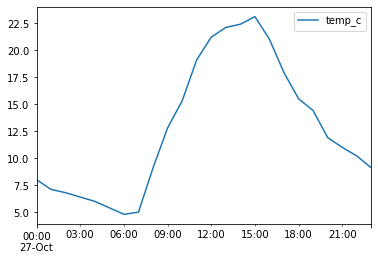

In [92]:
temp.plot()
# plot.show() -> if not in Jupyter Notebook

You could save the figure by doing this:  
`temp.plot().get_figure().savefig("temperatures.png")`

<AxesSubplot:ylabel='Frequency'>

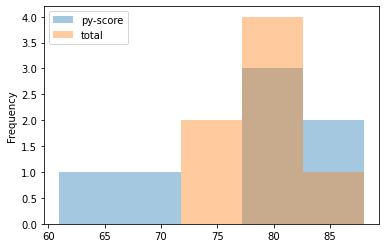

In [93]:
df.loc[:, ["py-score", "total"]].plot.hist(bins=5, alpha=0.4)

Misc
----

To compare 2 `DataFrame` or `Series`

In [94]:
orig = pd.Series(data=[1, 2, 3, 4])
new = pd.Series(data=[1, 2, 3, 4])
orig.equals(new)

True